In [142]:
# Import Libaries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
%matplotlib inline
plt.style.use('ggplot')
from matplotlib import colors
from matplotlib import gridspec
from matplotlib.ticker import StrMethodFormatter
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip3 install pickle5
import pickle5 as pickle

In [29]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import sklearn
sklearn.__version__
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [130]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Set the randomizer seed so results are the same each time
np.random.seed(1)

In [4]:
# import pickle5 as pickle
with open('WM-clean.pkl', "rb") as fh:
  data = pickle.load(fh)


In [5]:
data.head()

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train


In [16]:
# Get most frequent die size
print(data.groupby('dieSize').size().sort_values(ascending=False))

dieSize
516.0     16437
533.0     14350
776.0     12400
562.0     11252
518.0      9400
          ...  
3127.0        1
1397.0        1
1377.0        1
3203.0        1
3.0           1
Length: 645, dtype: int64


In [18]:
# Simplify dataset to only use 516 die size - remove this later after we align image size
data = data.loc[data['dieSize'] == 516]
data.head()

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset
65452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1,...",516.0,lot42869,1.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
65453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",516.0,lot42869,2.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
65454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",516.0,lot42869,3.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
65455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",516.0,lot42869,5.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test
65456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",516.0,lot42869,6.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train


In [111]:
# Add single label for model building

def label_wafer (row):
    string = ""
    if row['labels'][0] == 1:
        string += 'N'
    if row['labels'][1] == 1:
        string += 'ER'
    if row['labels'][2] == 1:
        string += 'EL'
    if row['labels'][3] == 1:
        string += 'C'
    if row['labels'][4] == 1:
        string += 'L'
    if row['labels'][5] == 1:
        string += 'S'
    if row['labels'][6] == 1:
        string += 'R'
    if row['labels'][7] == 1:
        string += 'D'
    if row['labels'][8] == 1:
        string += 'NF'
    if string == "":
        string = 'N'
    return string

def flat_map (row):
    return row['waferMap'].flatten()


data['wafer_label'] = data.apply (lambda row: label_wafer(row), axis=1)
data['flat_waferMap'] = data.apply (lambda row: flat_map(row), axis=1)
data.head()

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset,wafer_label,flat_waferMap
65452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1,...",516.0,lot42869,1.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, ..."
65453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",516.0,lot42869,2.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, ..."
65454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",516.0,lot42869,3.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, ..."
65455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",516.0,lot42869,5.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, ..."
65456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",516.0,lot42869,6.0,none,1,25,27,"(25, 27)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, ..."


In [112]:
# Check out train, dev and test data sets
print(data.groupby('dataset').size().sort_values(ascending=False))

dataset
train    11547
test      2495
dev       2395
dtype: int64


In [113]:
# Build out test, train, dev datasets and labels
test_data    = np.stack(data.loc[data['dataset'] == 'test']['flat_waferMap'].to_numpy())
test_labels  = data.loc[data['dataset'] == 'test']['wafer_label'].to_numpy()
dev_data     = np.stack(data.loc[data['dataset'] == 'dev']['flat_waferMap'].to_numpy())
dev_labels   = data.loc[data['dataset'] == 'dev']['wafer_label'].to_numpy()
train_data   = np.stack(data.loc[data['dataset'] == 'train']['flat_waferMap'].to_numpy())
train_labels = data.loc[data['dataset'] == 'train']['wafer_label'].to_numpy()
mini_train_data, mini_train_labels = train_data[:1000], train_labels[:1000]

In [114]:
# test_data = np.stack(test_data)
print('data shape: ', test_data.shape)
print('data 0 shape: ', test_data[0].shape)
print('label shape:', test_labels.shape)
print(type(test_data))
print(type(test_data[0]))
print(test_data[0])


data shape:  (2495, 675)
data 0 shape:  (675,)
label shape: (2495,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1
 1 2 2 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 1 1 1 2 1 2 1 2 2 1 1 1 2 1 1 1 1 1 2 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 0 0 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 0 0 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2
 1 1 1 2 1 2 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1
 1 1 1 1 2 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 2
 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 0 1 1 2 

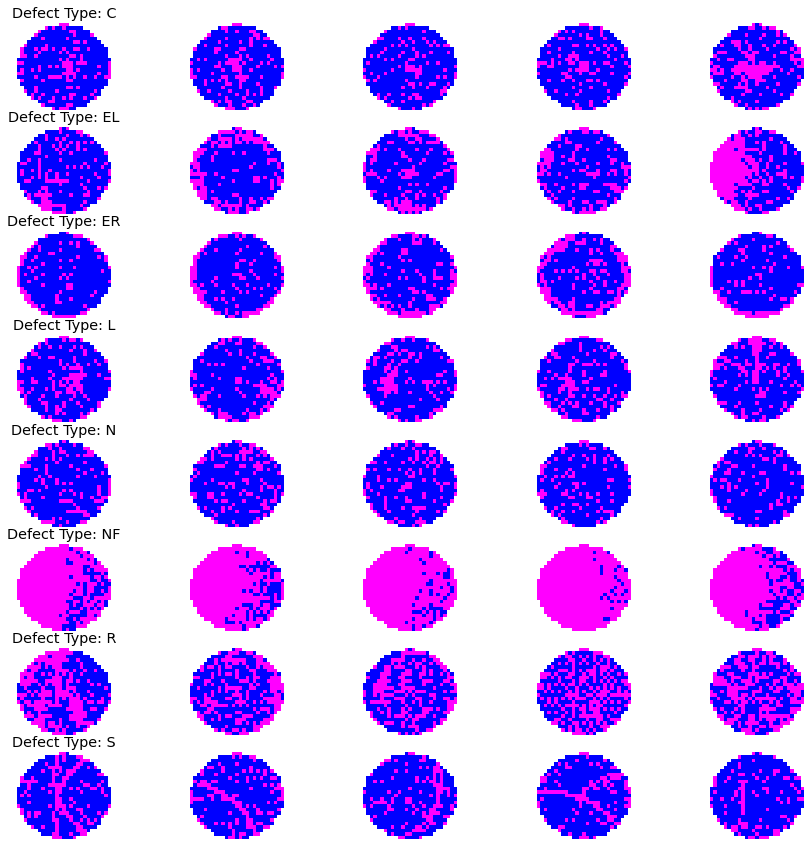

In [151]:
def show_wafermaps_types(num_examples=10):

### STUDENT START ###
    # Find unique digits, will be 0-9
    examples = np.unique(train_labels)   
    # Find the square dimentions of the X array for shaping for 2D Rendering, will be 28
#     dim = int(np.sqrt(mini_train_data.shape[1]))
    dim=(25,27)

    # Set to Black and White
    # make a color map of fixed colors - blue passing die, yellow failing die
    cmap = colors.ListedColormap(['white', 'blue', 'fuchsia'])
    plt.rc('image', cmap=cmap)

    # Setup Figure Size and number of sub plots, examples sent into function and number of digits
    fig, axs = plt.subplots(len(examples), num_examples, figsize=(15, 15))

    # Nested for loops to loop through all digits and number of examples input for ploting
    for i,d in enumerate(examples):
        for j in range(num_examples):
            # reshape as 2D for rendering from dimensions above
            # imshow to plot image in axs i,j loaction in plot
            axs[i,j].imshow(train_data[train_labels==d][j].reshape(dim))
            axs[i,j].axis('off')

            if j == 0:
                axs[i, j].set_title(f'Defect Type: {d}')
            
show_wafermaps_types(5)

In [139]:
def P2(k_values):

### STUDENT START ###

    # Produce k-Nearest Neighbors models with k ∈  [1,3,5,7,9] (passed in)
    # Loop through all passed in k values
    for x in k_values:
        print (50*'-','\n','K-value:',x)
        
        model = KNeighborsClassifier(n_neighbors=x)
        model.fit(train_data, train_labels)
        test_predicted_labels = model.predict(dev_data)
        correct_prediction = (test_predicted_labels == dev_labels)
        wrong_prediction = (test_predicted_labels != dev_labels)
        model_score = model.score(dev_data, dev_labels)

        # Evaluate and show the accuracy of each model.
        print (' total: %3d  correct: %3d  accuracy: %.2f%%' 
               %((np.sum(correct_prediction)+np.sum(wrong_prediction)), 
                 np.sum(correct_prediction), model_score*100))   
              
        #For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label
        if (x==1):
            print('\n', classification_report(dev_labels, test_predicted_labels))

            
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

-------------------------------------------------- 
 K-value: 1
 total: 2395  correct: 2321  accuracy: 96.91%

               precision    recall  f1-score   support

           C       0.50      0.10      0.17        10
          EL       0.88      0.17      0.28        42
          ER       0.00      0.00      0.00         2
           L       0.00      0.00      0.00        18
           N       0.97      1.00      0.99      2311
          NF       0.40      1.00      0.57         2
           R       0.00      0.00      0.00         8
           S       0.00      0.00      0.00         2

    accuracy                           0.97      2395
   macro avg       0.34      0.28      0.25      2395
weighted avg       0.96      0.97      0.96      2395

-------------------------------------------------- 
 K-value: 3


C:\Users\scott\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 total: 2395  correct: 2320  accuracy: 96.87%
-------------------------------------------------- 
 K-value: 5


KeyboardInterrupt: 

------------------------------------------------------------ 
Training Set Size: 100
 Total: 2395  Correct: 2313  Accuracy: 96.58%  Time: 0.54236sec
------------------------------------------------------------ 
Training Set Size: 200
 Total: 2395  Correct: 2313  Accuracy: 96.58%  Time: 1.00757sec
------------------------------------------------------------ 
Training Set Size: 400
 Total: 2395  Correct: 2316  Accuracy: 96.70%  Time: 1.97449sec
------------------------------------------------------------ 
Training Set Size: 800
 Total: 2395  Correct: 2318  Accuracy: 96.78%  Time: 3.86798sec
------------------------------------------------------------ 
Training Set Size: 1600
 Total: 2395  Correct: 2318  Accuracy: 96.78%  Time: 9.24911sec
------------------------------------------------------------ 
Training Set Size: 3200
 Total: 2395  Correct: 2321  Accuracy: 96.91%  Time: 19.66654sec
------------------------------------------------------------ 
Training Set Size: 6400
 Total: 2395  Cor

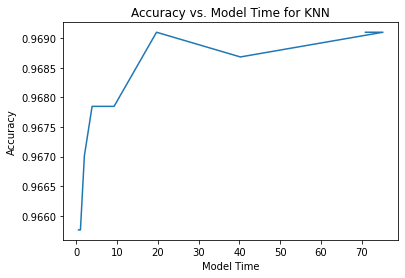

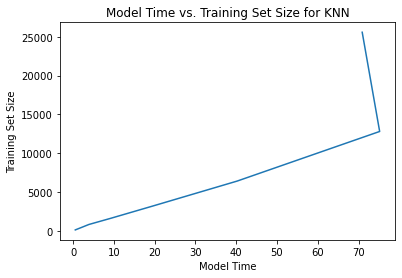

In [119]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    times = []
    # Produce 1-Nearest Neighbor models using training data of various sizes (train_sizes)
    for x in train_sizes:
        start = time.time()
        print (60*'-','\nTraining Set Size:', x)
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data[:x], train_labels[:x])
        
        # Calculate Key Performance Metrics
        test_predicted_labels = model.predict(dev_data)
        correct_prediction = (test_predicted_labels == dev_labels)
        wrong_prediction = (test_predicted_labels != dev_labels)
        model_score = model.score(dev_data, dev_labels)
        accuracies.append(model_score)

        # Calculate and build array for plots
        model_time = time.time() - start
        times.append(model_time)
        
        # Print Performance Metrics
        print (' Total: %3d  Correct: %3d  Accuracy: %.2f%%  Time: %.5fsec' 
               %((np.sum(correct_prediction)+np.sum(wrong_prediction)), 
                 np.sum(correct_prediction), model_score*100, model_time))   
        
    # Plot Accuracy vs Model Time
    plt.plot(times, accuracies)
    plt.xlabel("Model Time")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs. Model Time for KNN")
    plt.show() 
    
    # Plot Model Time vs Training Set Size
    plt.plot(times, train_sizes)
    plt.xlabel("Model Time")
    plt.ylabel("Training Set Size")
    plt.title("Model Time vs. Training Set Size for KNN")
    plt.show() 

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

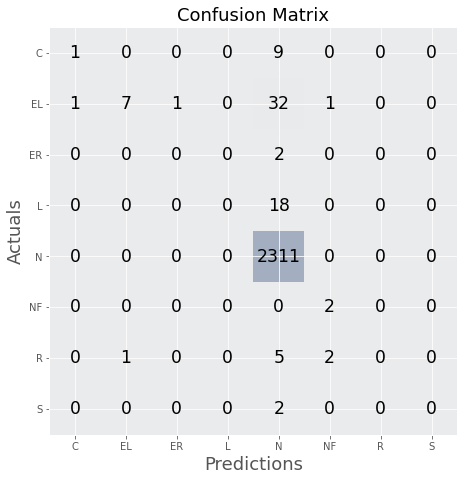

In [159]:
def P5():

    # Find unique wafer patterns
    elements = np.unique(train_labels)
    
    # Find the square dimentions of the X array for shaping for 2D Rendering, will be 28
#     dim = int(np.sqrt(X.shape[1]))

    # Build Model and Confusion Matrix
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(dev_data)
    cm = confusion_matrix(dev_labels, predicted_labels, labels=model.classes_)
    
    # Plot Confusion matrix and find top misclassifications
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
    plt.xticks(ticks=np.arange(len(elements)),labels=elements)
    plt.yticks(ticks=np.arange(len(elements)),labels=elements)
    plt.tick_params(axis='both', which='major', labelsize=10, 
                    labelbottom = True, bottom=True, top = False, labeltop=False)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    
    
### STUDENT END ###

P5()

In [132]:
## Create current best classifier
hidden_layer_sizes = tuple([100]*10)

# build classifier
classifier = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, 
                           early_stopping = True, alpha = 0.0001)

# fit classifier to training data
classifier.fit(train_data, train_labels)

# make predictions of test data
predictions = classifier.predict(test_data)

C:\Users\scott\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           C       0.00      0.00      0.00         6
          EL       0.00      0.00      0.00        43
          ER       0.00      0.00      0.00         1
           L       0.00      0.00      0.00        23
           N       0.97      1.00      0.98      2409
          NF       0.00      0.00      0.00         8
           R       0.00      0.00      0.00         4
           S       0.00      0.00      0.00         1

    accuracy                           0.97      2495
   macro avg       0.12      0.12      0.12      2495
weighted avg       0.93      0.97      0.95      2495



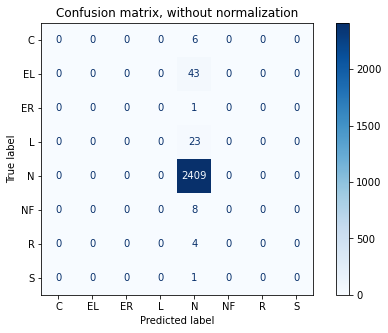

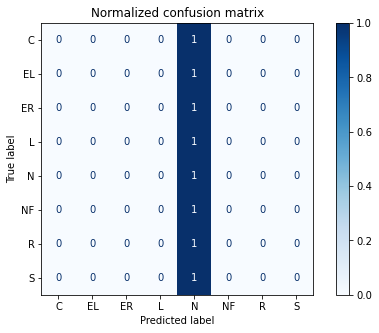

Overall accuracy: 96.55310621242485%


In [135]:
# generate and print classification report

# Find unique wafer patterns
elements = np.unique(train_labels)

print(classification_report(test_labels, predictions))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, test_data, test_labels,
                                 display_labels= elements,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    fig = plt.gcf()
    fig.set_size_inches(8,5)

plt.show()

# calculate and print accuracy
print("Overall accuracy: " + 
      str(100*metrics.accuracy_score(test_labels, predictions)) + "%")

In [153]:
## Use grid search to evaluate parameters

# choose variables for grid search
parameters = {"activation": ["identity", "logistic", "tanh", "relu"]}

# build classifier
classifier = GridSearchCV(MLPClassifier(hidden_layer_sizes = hidden_layer_sizes,
                                        early_stopping = True), 
                          param_grid = parameters, cv = 10, 
                          scoring = "accuracy")

# fit classifier to training data
classifier.fit(train_data, train_labels)

# make predictions of test data
predictions = classifier.predict(test_data)

C:\Users\scott\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [155]:
print("Best parameters = ", classifier.best_params_)

# calculate and print accuracy
print("Best accuracy: " + 
      str(100*metrics.accuracy_score(test_labels, predictions)) + "%")

Best parameters =  {'activation': 'identity'}
Best accuracy: 96.55310621242485%


In [157]:
## Use manual loop to evaluate parameters

for activation in parameters["activation"]:
    
    # build classifier
    classifier = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes,
                               early_stopping = True, activation = activation)

    # fit classifier to training data
    classifier.fit(train_data, train_labels)

    # make predictions of test data
    predictions = classifier.predict(test_data)

    print("Activation: " + activation)
    # calculate and print accuracy
    print("Accuracy: " + 
      str(100*metrics.accuracy_score(test_labels, predictions)) + "%")

Activation: identity
Accuracy: 96.55310621242485%
Activation: logistic
Accuracy: 96.55310621242485%
Activation: tanh
Accuracy: 96.55310621242485%
Activation: relu
Accuracy: 96.55310621242485%
